## Кошки и собаки: используем датасет

В этом ноутбуке мы рассмотрим, как обучить модель отличать кошек и собак на фотографии с использованием датасетов в DataSphere.

**ВАЖНО**: Мы предполагаем, что в директории `/home/jupyter/mnt/datasets/catsdogs/home/jupyter/mnt/datasets/catsdogs` смонтирован датасет с [Kaggle Cats and Dogs](https://www.microsoft.com/en-us/download/details.aspx?id=54765https://www.microsoft.com/en-us/download/details.aspx?id=54765). Если это не так, и необходимо этот датасет создать - запустите ноутбук `create-dataset.ipynb`. Если же вы используете готовый датасет, то его надо будет добавить в проект и активировать.

Для начала загрузим необходимые библиотеки:

## Обучаем модель

Код ниже предполагает, что датасет смонтирован в директории `/home/jupyter/mnt/datasets/catsdogs`. Если если вы только что создали датасет, выполнив предыдущую ячейку - то так оно и будет.

Для начала импортируем необходимые библиотеки:

In [1]:
import os
# Отключаем лишние сообщения от Tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras 

print(f"Версия Tensorflow: {tf.__version__}")

Версия Tensorflow: 2.12.0


фыфывв

In [79]:
path = '/home/jupyter/mnt/datasets/catsdogs/PetImages'

IMG_SIZE = 224

train_ds,val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            path,
            shuffle=True,
            image_size=(IMG_SIZE,IMG_SIZE),
            validation_split=0.2,
            subset='both',
            seed=13)

classes = train_ds.class_names

Found 24769 files belonging to 2 classes.
Using 19816 files for training.
Using 4953 files for validation.


Посмотрим, как выглядят изображения в датасете:

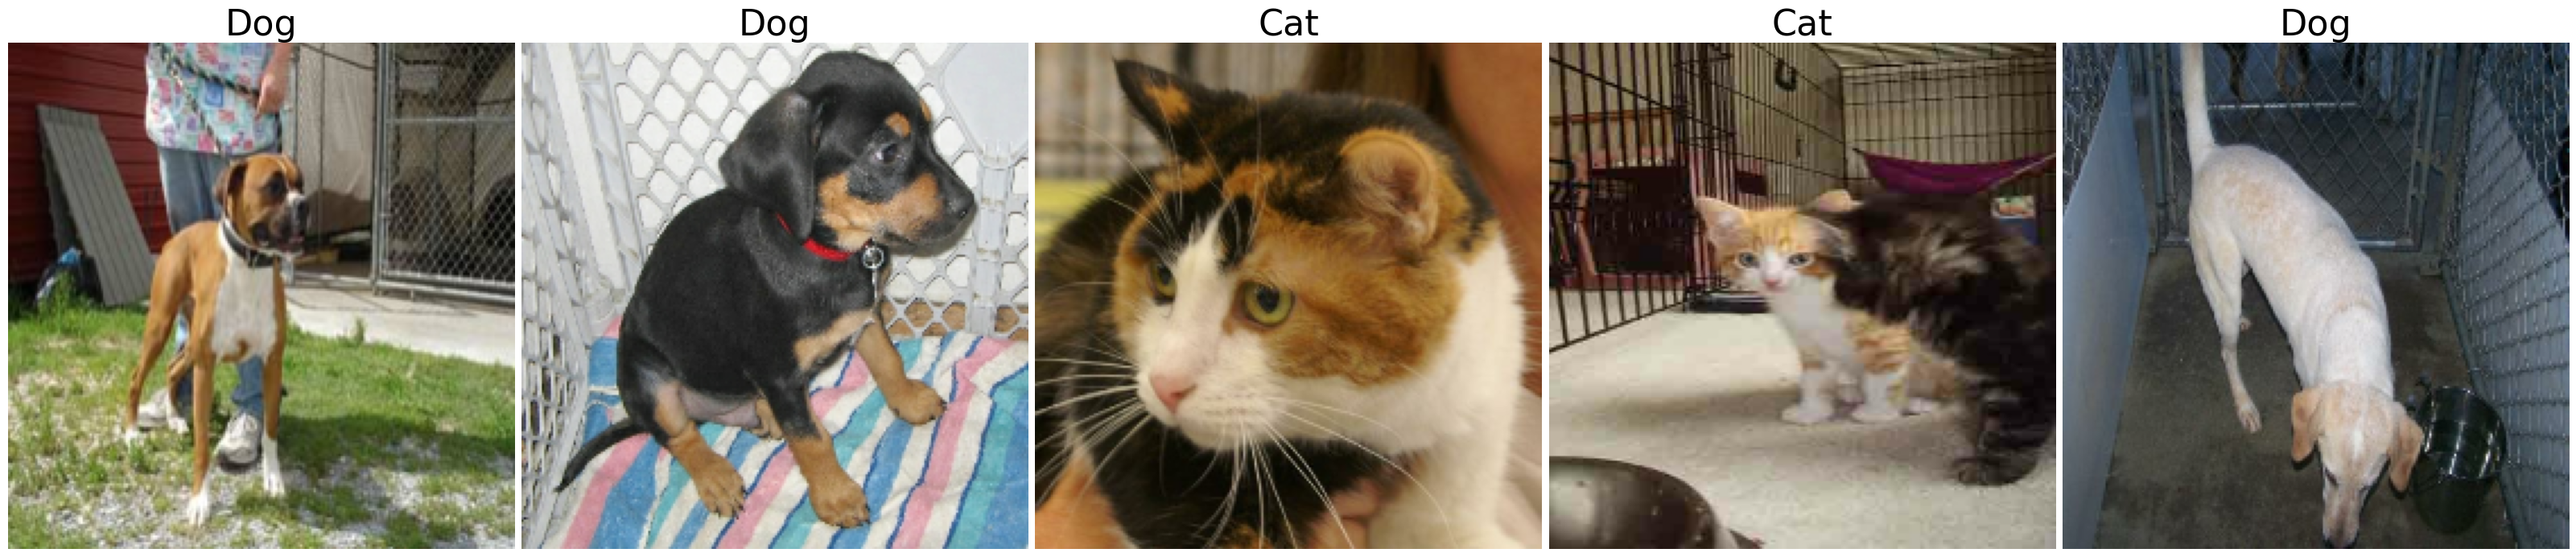

In [80]:
def display_images(l,titles=None,fontsize=32):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()
    
for x,y in train_ds:
    break

display_images(x[:5]/255.,titles=[classes[i] for i in y][:5])

Загрузим базовую модель - будем использовать ResNet50. Эту модель мы заморозим и будем использовать лишь как feature extractor.

In [81]:
base_model = keras.applications.ResNet50V2(
                            include_top=False, # Exclude ImageNet classifier at the top.
                            weights="imagenet",
                            input_shape=(IMG_SIZE, IMG_SIZE, 3)
                            )
base_model.trainable = False

Oпишем нашу модель классификации:
* В качестве первого слоя используем функцию предобработки изображений `preprocess_input`, чтобы не вызывать её отдельно для всего датасета, а делать это внутри самой модели
* После применения базовой модели используем `Flatten` для превращения объемного тензора в вектор
* На последней слое используем один нейрон с функцией активации `sigmoid`

In [82]:
model = keras.Sequential([
    keras.layers.Lambda(lambda x : keras.applications.resnet_v2.preprocess_input(x)),
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

Начинаем обучение модели:

In [83]:
EPOCHS = 3

history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/5
 59/620 [=>............................] - ETA: 21s - loss: 0.4247 - acc: 0.9571

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


241/620 [==========>...................] - ETA: 14s - loss: 0.4467 - acc: 0.9713

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


269/620 [============>.................] - ETA: 13s - loss: 0.4324 - acc: 0.9727

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


289/620 [============>.................] - ETA: 12s - loss: 0.4286 - acc: 0.9733

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


381/620 [=================>............] - ETA: 9s - loss: 0.4184 - acc: 0.9756

523/620 [========================>.....] - ETA: 3s - loss: 0.4278 - acc: 0.9772

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


543/620 [=========================>....] - ETA: 2s - loss: 0.4323 - acc: 0.9777

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


583/620 [===========================>..] - ETA: 1s - loss: 0.4506 - acc: 0.9774

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


619/620 [============================>.] - ETA: 0s - loss: 0.4595 - acc: 0.9778

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


620/620 [==============================] - 35s 49ms/step - loss: 0.4593 - acc: 0.9778 - val_loss: 0.4769 - val_acc: 0.9828
Epoch 2/5
 59/620 [=>............................] - ETA: 20s - loss: 0.1919 - acc: 0.9921

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


241/620 [==========>...................] - ETA: 14s - loss: 0.1140 - acc: 0.9934

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


269/620 [============>.................] - ETA: 13s - loss: 0.1220 - acc: 0.9936

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


289/620 [============>.................] - ETA: 12s - loss: 0.1189 - acc: 0.9935

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


381/620 [=================>............] - ETA: 8s - loss: 0.1204 - acc: 0.9937

523/620 [========================>.....] - ETA: 3s - loss: 0.1162 - acc: 0.9938

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


543/620 [=========================>....] - ETA: 2s - loss: 0.1190 - acc: 0.9936

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


583/620 [===========================>..] - ETA: 1s - loss: 0.1298 - acc: 0.9932

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


619/620 [============================>.] - ETA: 0s - loss: 0.1280 - acc: 0.9933

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


620/620 [==============================] - 29s 46ms/step - loss: 0.1280 - acc: 0.9933 - val_loss: 0.5902 - val_acc: 0.9838
Epoch 3/5
 59/620 [=>............................] - ETA: 21s - loss: 0.1243 - acc: 0.9952

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


241/620 [==========>...................] - ETA: 14s - loss: 0.1026 - acc: 0.9951

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


269/620 [============>.................] - ETA: 13s - loss: 0.1083 - acc: 0.9950

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


289/620 [============>.................] - ETA: 12s - loss: 0.1077 - acc: 0.9948

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


381/620 [=================>............] - ETA: 8s - loss: 0.0969 - acc: 0.9953

523/620 [========================>.....] - ETA: 3s - loss: 0.0848 - acc: 0.9957

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


543/620 [=========================>....] - ETA: 2s - loss: 0.0841 - acc: 0.9957

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


583/620 [===========================>..] - ETA: 1s - loss: 0.0791 - acc: 0.9958

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


619/620 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9958

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


620/620 [==============================] - 29s 46ms/step - loss: 0.0777 - acc: 0.9958 - val_loss: 0.5733 - val_acc: 0.9859
Epoch 4/5
 59/620 [=>............................] - ETA: 20s - loss: 0.0630 - acc: 0.9958

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


241/620 [==========>...................] - ETA: 14s - loss: 0.0535 - acc: 0.9961

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


269/620 [============>.................] - ETA: 13s - loss: 0.0495 - acc: 0.9964

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


289/620 [============>.................] - ETA: 12s - loss: 0.0460 - acc: 0.9966

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


381/620 [=================>............] - ETA: 8s - loss: 0.0539 - acc: 0.9966

523/620 [========================>.....] - ETA: 3s - loss: 0.0508 - acc: 0.9971

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


543/620 [=========================>....] - ETA: 2s - loss: 0.0517 - acc: 0.9971

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


583/620 [===========================>..] - ETA: 1s - loss: 0.0498 - acc: 0.9972

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


619/620 [============================>.] - ETA: 0s - loss: 0.0478 - acc: 0.9972

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


620/620 [==============================] - 29s 46ms/step - loss: 0.0478 - acc: 0.9972 - val_loss: 0.6521 - val_acc: 0.9861
Epoch 5/5
 59/620 [=>............................] - ETA: 20s - loss: 0.0276 - acc: 0.9989

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


241/620 [==========>...................] - ETA: 14s - loss: 0.0187 - acc: 0.9991

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


269/620 [============>.................] - ETA: 13s - loss: 0.0231 - acc: 0.9987

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


289/620 [============>.................] - ETA: 12s - loss: 0.0221 - acc: 0.9987

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


381/620 [=================>............] - ETA: 8s - loss: 0.0205 - acc: 0.9987

523/620 [========================>.....] - ETA: 3s - loss: 0.0255 - acc: 0.9984

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


543/620 [=========================>....] - ETA: 2s - loss: 0.0250 - acc: 0.9984

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


583/620 [===========================>..] - ETA: 1s - loss: 0.0284 - acc: 0.9983

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


619/620 [============================>.] - ETA: 0s - loss: 0.0295 - acc: 0.9983

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


620/620 [==============================] - 29s 46ms/step - loss: 0.0295 - acc: 0.9983 - val_loss: 0.7030 - val_acc: 0.9863


Несмотря на то, что мы почистили датасет от испорченных файлов, всё равно Tensorflow не может открыть некоторые файлы, из-за чего возникают ошибки *Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9*.

Построим график изменения точности на обучающей и валидационной выборках в процессе обучения:

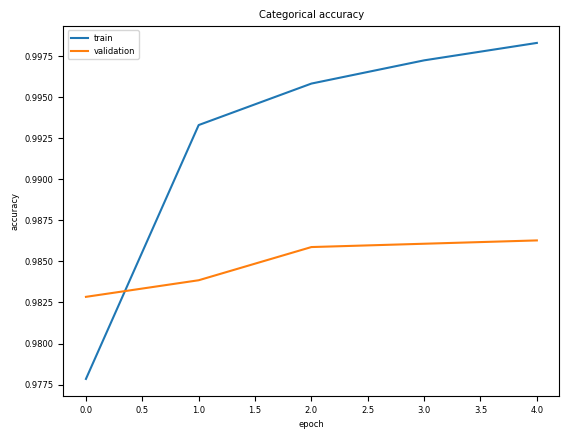

In [84]:
def plot_hist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('Categorical accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

Для оценки качества модели построим матрицу ошибок:

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


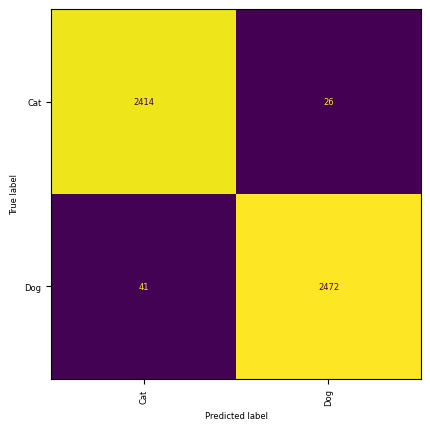

In [91]:
import numpy as np 
from sklearn.metrics import ConfusionMatrixDisplay
y_pred, y_true = [], []
for x,y in val_ds:
    z = model.predict(x,verbose=False).astype(int)
    y_pred.extend(z)
    y_true.extend(y)

ConfusionMatrixDisplay.from_predictions(y_true,y_pred,
                                        display_labels=classes,
                                        xticks_rotation='vertical',
                                        colorbar=False)

Мы добились неплохой точности модели! Для улучшения качества модели можно:
* Использовать аугментацию данных в процессе обучения 
* Попробовать различные базовые модели и другие гиперпараметры (число слоёв полносвязного классификатора и т.д.)
